This notebooks illustrates the use of the package on the examples included in the paper

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import os
from optimaladj.CausalGraph import CausalGraph

### Figure 1

In [2]:
treatment = 'warm-up'
outcome = 'injury'

L = ['team motivation', 'previous injury']
N = ['team motivation', 'previous injury', 'warm-up', 'coach', 'fitness', 'contact sport', 'neuromusc fatigue', 'tissue disorder', 'injury']


G = CausalGraph()
G.add_edges_from([('coach', 'team motivation'),
                  ('coach', 'fitness'),
                  ('fitness', 'pre-game prop'),
                  ('fitness', 'neuromusc fatigue'),
                  ('team motivation', 'warm-up'),
                  ('team motivation', 'previous injury'),
                  ('pre-game prop', 'warm-up'),
                  ('warm-up', 'intra-game prop'), 
                  ('contact sport', 'previous injury'),
                  ('contact sport', 'intra-game prop'),
                  ('intra-game prop', 'injury'),
                  ('genetics', 'fitness'),
                  ('genetics', 'neuromusc fatigue'),
                  ('genetics', 'tissue disorder'),
                  ('tissue disorder', 'neuromusc fatigue'), 
                  ('tissue disorder', 'tissue weakness'),
                  ('neuromusc fatigue', 'intra-game prop'),
                  ('neuromusc fatigue', 'injury'),
                  ('tissue weakness', 'injury')])

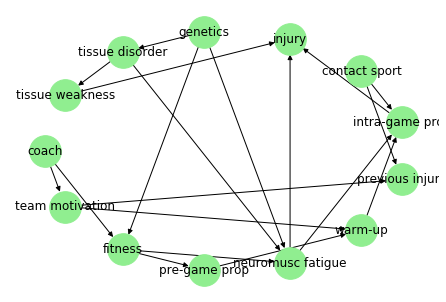

In [3]:
nx.draw_shell(G, with_labels=True, node_color='lightgreen', node_size = 1000)

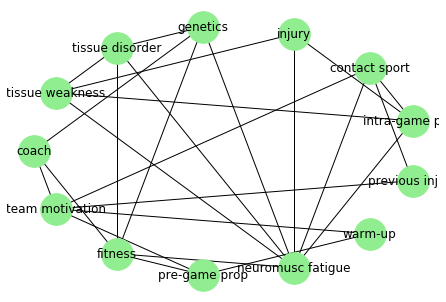

In [4]:
H0 = G.build_H0(treatment, outcome, L)
nx.draw_shell(H0, with_labels=True, node_color='lightgreen', node_size = 1000)

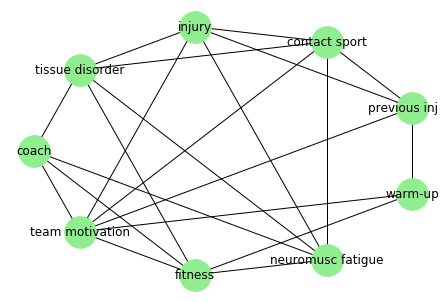

In [5]:
H1 = G.build_H1(treatment, outcome, L, N)
nx.draw_shell(H1, with_labels=True, node_color='lightgreen', node_size = 1000)

In [6]:
G.optimal_adj_set(treatment, outcome, L, N)

{'contact sport',
 'neuromusc fatigue',
 'previous injury',
 'team motivation',
 'tissue disorder'}

In [7]:
G.optimal_minimal_adj_set(treatment, outcome, L, N)

{'neuromusc fatigue', 'previous injury', 'team motivation', 'tissue disorder'}

In [8]:
G.optimal_minimum_adj_set(treatment, outcome, L, N)

{'fitness', 'previous injury', 'team motivation'}

### Figure 3

In [46]:
treatment = 'A'
outcome = 'Y'

L = ['T']
N = ['A', 'Y', 'M', 'T', 'F']

G = CausalGraph()
G.add_edges_from([('A', 'M'),
                  ('T', 'A'),
                  ('T', 'F'),
                  ('F', 'A'),
                  ('U', 'F'),
                  ('U', 'Y'),
                  ('M', 'Y')])

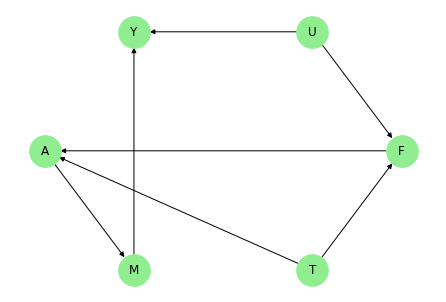

In [47]:
nx.draw_shell(G, with_labels=True, node_color='lightgreen', node_size = 1000)

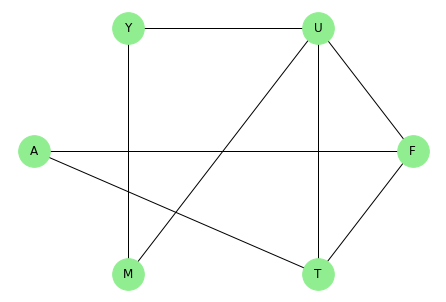

In [48]:
H0 = G.build_H0(treatment, outcome, L)
nx.draw_shell(H0, with_labels=True, node_color='lightgreen', node_size = 1000)

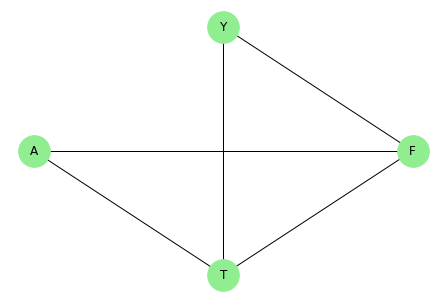

In [49]:
H1 = G.build_H1(treatment, outcome, L, N)
nx.draw_shell(H1, with_labels=True, node_color='lightgreen', node_size = 1000)

In [50]:
G.optimal_adj_set(treatment, outcome, L, N)

{'F', 'T'}

In [51]:
G.optimal_minimal_adj_set(treatment, outcome, L, N)

{'F', 'T'}

In [52]:
G.optimal_minimum_adj_set(treatment, outcome, L, N)

{'F', 'T'}

### Figure 4

In [53]:
treatment = 'A'
outcome = 'Y'

L = ['T']
N = ['A', 'Y', 'T', 'W1', 'W2', 'W3', 'W4']

G = CausalGraph()
G.add_edges_from([('A', 'Y'),
                  ('T', 'W1'),
                  ('T', 'Y'),
                  ('W1', 'A'),
                  ('W2', 'W1'),
                  ('W2', 'Y'),
                  ('W3', 'W1'),
                  ('W3', 'Y'),
                  ('W4', 'Y')])

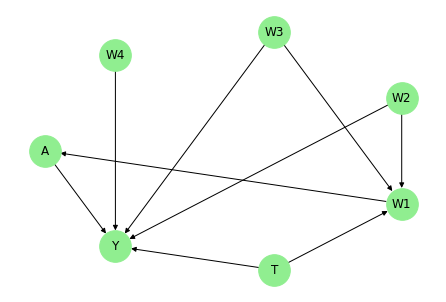

In [54]:
nx.draw_shell(G, with_labels=True, node_color='lightgreen', node_size = 1000)

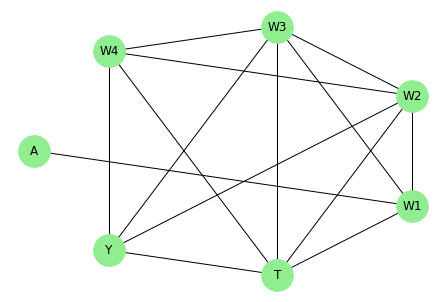

In [55]:
H0 = G.build_H0(treatment, outcome, L)
nx.draw_shell(H0, with_labels=True, node_color='lightgreen', node_size = 1000)

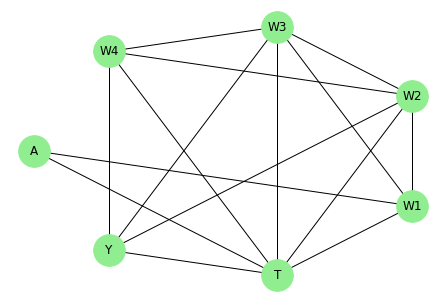

In [56]:
H1 = G.build_H1(treatment, outcome, L, N)
nx.draw_shell(H1, with_labels=True, node_color='lightgreen', node_size = 1000)

In [57]:
G.optimal_adj_set(treatment, outcome, L, N)

{'T', 'W2', 'W3', 'W4'}

In [58]:
G.optimal_minimal_adj_set(treatment, outcome, L, N)

{'T', 'W2', 'W3'}

In [16]:
G.optimal_minimum_adj_set(treatment, outcome, L, N)

{'T', 'W1'}

### Figure 5

In [17]:
treatment = 'A'
outcome = 'Y'

L = []
N = ['A', 'Y', 'Z1', 'Z2']

G = CausalGraph()
G.add_edges_from([('A', 'Y'),
                  ('Z1', 'A'),
                  ('Z1', 'Z2'),
                  ('U', 'Z2'),
                  ('U', 'Y')])

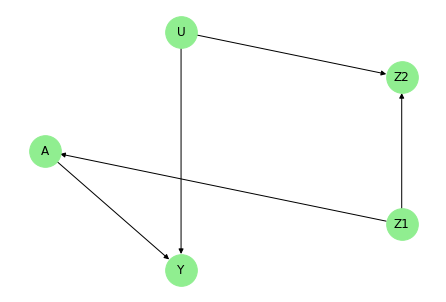

In [18]:
nx.draw_shell(G, with_labels=True, node_color='lightgreen', node_size = 1000)

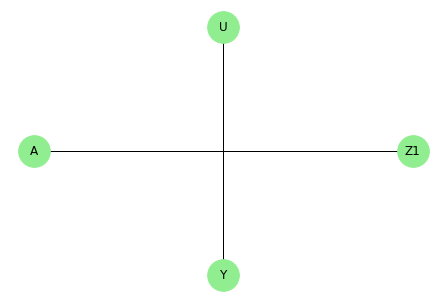

In [19]:
H0 = G.build_H0(treatment, outcome, L)
nx.draw_shell(H0, with_labels=True, node_color='lightgreen', node_size = 1000)

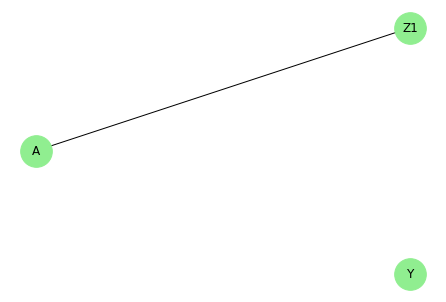

In [20]:
H1 = G.build_H1(treatment, outcome, L, N)
nx.draw_shell(H1, with_labels=True, node_color='lightgreen', node_size = 1000)

In [21]:
G.optimal_adj_set(treatment, outcome, L, N)

ConditionException: Conditions to guarantee the existence of an optimal adjustment set are not satisfied

In [ ]:
G.optimal_minimal_adj_set(treatment, outcome, L, N)

In [22]:
G.optimal_minimum_adj_set(treatment, outcome, L, N)

set()

### Figure 6

In [23]:
treatment = 'A'
outcome = 'Y'

L = ['T']
N = ['A', 'Y', 'T', 'F']


G = CausalGraph()
G.add_edges_from([('T', 'A'),
                    ('A', 'Y'),
                    ('U', 'Y'),
                    ('U', 'F')])

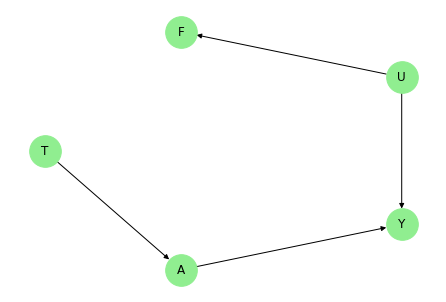

In [24]:
nx.draw_shell(G, with_labels=True, node_color='lightgreen', node_size = 1000)

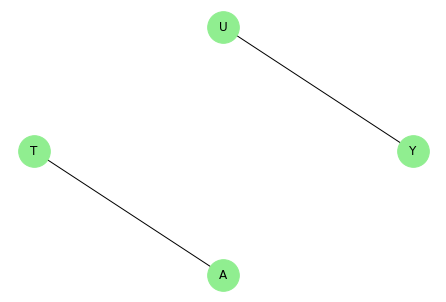

In [25]:
H0 = G.build_H0(treatment, outcome, L)
nx.draw_shell(H0, with_labels=True, node_color='lightgreen', node_size = 1000)

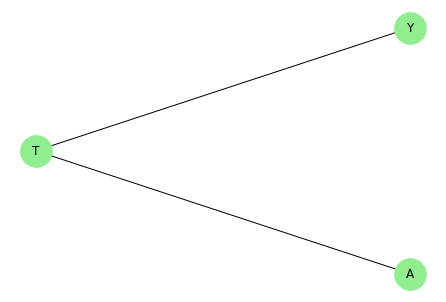

In [26]:
H1 = G.build_H1(treatment, outcome, L, N)
nx.draw_shell(H1, with_labels=True, node_color='lightgreen', node_size = 1000)

In [27]:
G.optimal_adj_set(treatment, outcome, L, N)

ConditionException: Conditions to guarantee the existence of an optimal adjustment set are not satisfied

In [28]:
G.optimal_minimal_adj_set(treatment, outcome, L, N)

{'T'}

In [29]:
G.optimal_minimum_adj_set(treatment, outcome, L, N)

{'T'}